Index(['outcome', 'Trend', 'category', 'b_APOMO95445', 'pval_APOMO95445',
       'b_CD276', 'pval_CD276', 'b_Dementia', 'pval_Dementia',
       'b_Dementia in Alzheimer disease', 'pval_Dementia in Alzheimer disease',
       'b_Dementia in other diseases classified elsewhere',
       'pval_Dementia in other diseases classified elsewhere', 'b_EGFRP00533',
       'pval_EGFRP00533', 'b_GDF15Q99988', 'pval_GDF15Q99988', 'b_GHRLQ9UBU3',
       'pval_GHRLQ9UBU3', 'b_LGALS4P56470', 'pval_LGALS4P56470',
       'b_Unspecified dementia', 'pval_Unspecified dementia',
       'b_Vascular dementia', 'pval_Vascular dementia', 'b_demenitameta',
       'pval_demenitameta', 'pval_anycause'],
      dtype='object')


/opt/conda/lib/python3.12/site-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/opt/conda/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


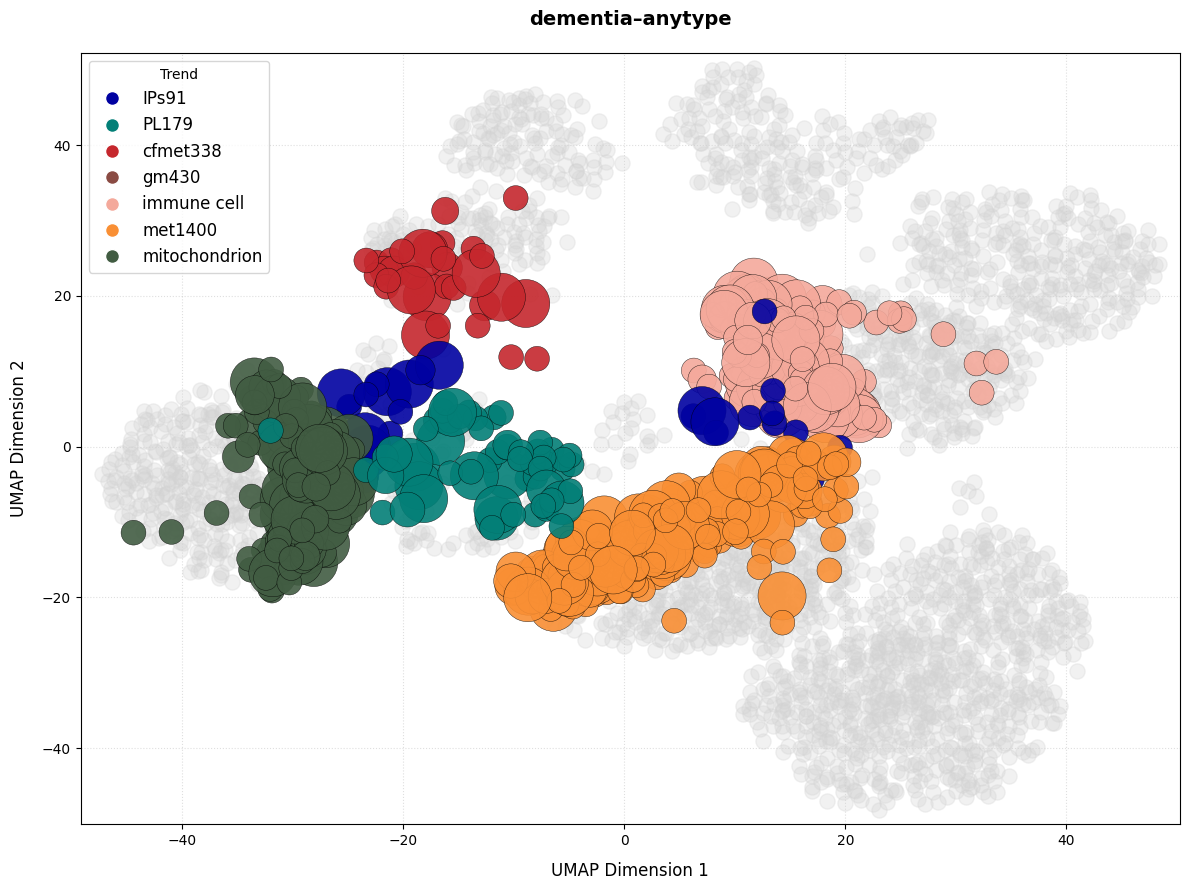

Adjusted Rand Index: 0.167
Silhouette Score: 0.193


In [2]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score


filtered_df = pd.read_csv('/code/Figure6/Figure6ab/dementia_MR_combined_IVW4_cleaned.csv', encoding='utf-8-sig')

filtered_df.columns = filtered_df.columns.str.strip()


print(filtered_df.columns)


features = filtered_df.iloc[:, 2:].values
trend_labels = filtered_df['Trend'].values


pval_fam3c = filtered_df['pval_anycause'].values


le = LabelEncoder()
trend_encoded = le.fit_transform(trend_labels)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=len(le.classes_), random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(
    np.column_stack([scaled_features, trend_encoded * 0.5])
)

umap_model = umap.UMAP(
    n_neighbors=35,
    min_dist=4,
    spread=5,
    local_connectivity=2,
    n_components=2,
    metric='euclidean',
    random_state=42,
    target_weight=0.4,
    repulsion_strength=1
)
umap_result = umap_model.fit_transform(scaled_features, y=trend_encoded)


custom_colors = ['#0001A1', '#037F77', '#C5272D', '#8A4B43', '#F4A99B', '#F98F34', '#415C42', '#FFDC00']
cmap = ListedColormap(custom_colors[:len(le.classes_)])

norm = BoundaryNorm(boundaries=np.arange(-0.5, len(le.classes_)+0.5), ncolors=len(le.classes_))


gray_size = 120
k = 3
max_size = 1200
sizes = np.where(
    pval_fam3c < 0.05,
    np.minimum(k / pval_fam3c, max_size),
    gray_size
)
sizes = np.minimum(sizes, max_size)
sizes = np.maximum(sizes, gray_size + 200)


plt.figure(figsize=(12, 9))
ax = plt.gca()


def get_compact_range(arr, margin=0.02):
    r = np.ptp(arr)
    return np.min(arr) - r*margin, np.max(arr) + r*margin

ax.set_xlim(*get_compact_range(umap_result[:,0]))
ax.set_ylim(*get_compact_range(umap_result[:,1]))


mask_sig = pval_fam3c < 0.05
scatter_sig = ax.scatter(
    umap_result[mask_sig,0], umap_result[mask_sig,1],
    c=trend_encoded[mask_sig],
    cmap=cmap,
    norm=norm,
    s=sizes[mask_sig],
    edgecolors='black',
    linewidth=0.3,
    alpha=0.9,
    zorder=3
)


mask_nonsig = ~mask_sig
ax.scatter(
    umap_result[mask_nonsig,0], umap_result[mask_nonsig,1],
    c='lightgray',
    s=gray_size,
    alpha=0.3,
    zorder=2
)


handles = [
    plt.Line2D([0],[0], marker='o', color='w',
               label=cls, markerfacecolor=custom_colors[i],
               markersize=10)
    for i, cls in enumerate(le.classes_)
]
plt.legend(handles=handles, title="Trend", loc='best', fontsize=12)


plt.title('dementia–anytype', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('UMAP Dimension 1', fontsize=12, labelpad=10)
plt.ylabel('UMAP Dimension 2', fontsize=12, labelpad=10)


ax.grid(True, linestyle=':', alpha=0.4, which='both')
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('/results/figure6aenhanced_umap_with_dementia-anytype.pdf',
            dpi=600, bbox_inches='tight')
plt.show()


ari = adjusted_rand_score(trend_labels, kmeans_labels)
silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")


Index(['outcome', 'Trend', 'category', 'b_APOMO95445', 'pval_APOMO95445',
       'b_CD276', 'pval_CD276', 'b_Dementia', 'pval_Dementia',
       'b_Dementia in Alzheimer disease', 'pval_Dementia in Alzheimer disease',
       'b_Dementia in other diseases classified elsewhere',
       'pval_Dementia in other diseases classified elsewhere', 'b_EGFRP00533',
       'pval_EGFRP00533', 'b_GDF15Q99988', 'pval_GDF15Q99988', 'b_GHRLQ9UBU3',
       'pval_GHRLQ9UBU3', 'b_LGALS4P56470', 'pval_LGALS4P56470',
       'b_Unspecified dementia', 'pval_Unspecified dementia',
       'b_Vascular dementia', 'pval_Vascular dementia', 'b_demenitameta',
       'pval_demenitameta', 'pval_anycause'],
      dtype='object')


/opt/conda/lib/python3.12/site-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/opt/conda/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


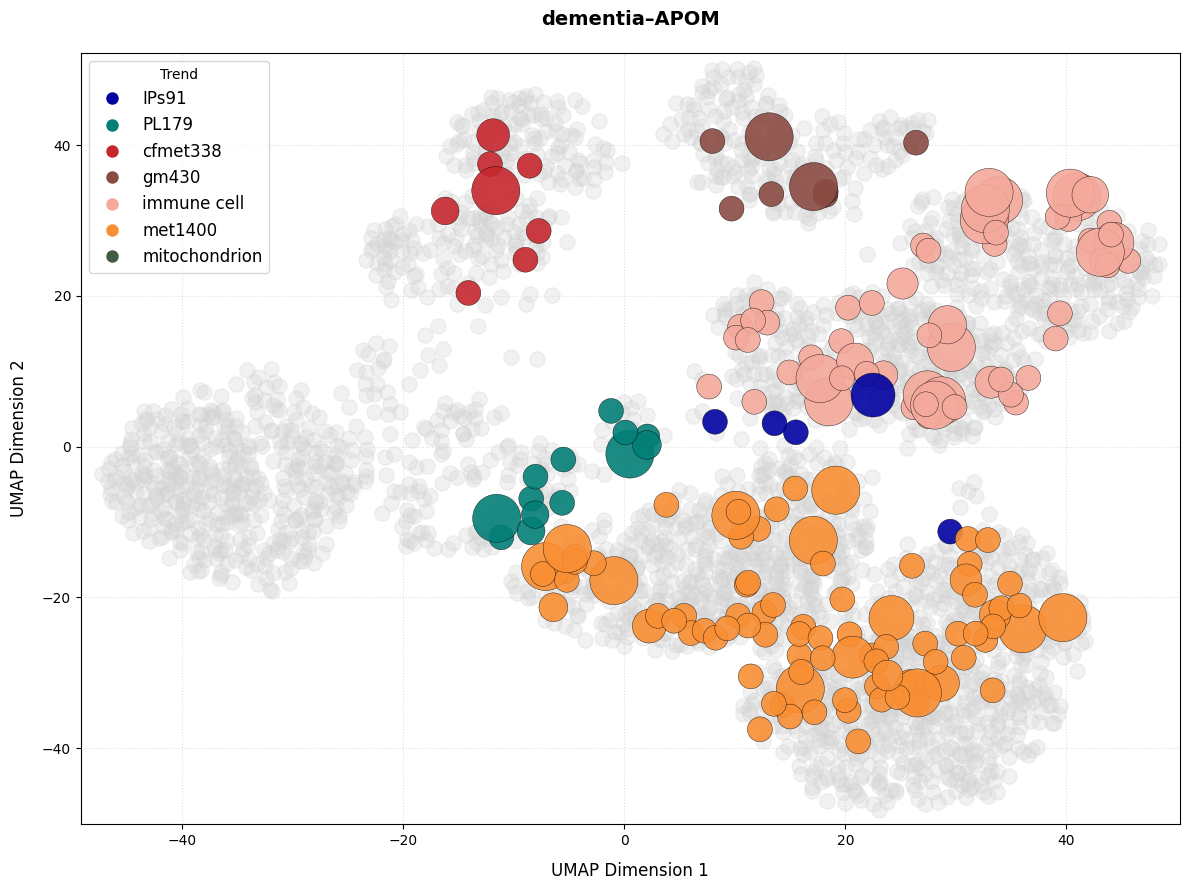

Adjusted Rand Index: 0.167
Silhouette Score: 0.193


In [3]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score


filtered_df = pd.read_csv('/code/Figure6/Figure6ab/dementia_MR_combined_IVW4_cleaned.csv', encoding='utf-8-sig')

filtered_df.columns = filtered_df.columns.str.strip()


print(filtered_df.columns)


features = filtered_df.iloc[:, 2:].values
trend_labels = filtered_df['Trend'].values

pval_fam3c = filtered_df['pval_APOMO95445'].values


le = LabelEncoder()
trend_encoded = le.fit_transform(trend_labels)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=len(le.classes_), random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(
    np.column_stack([scaled_features, trend_encoded * 0.5])
)


umap_model = umap.UMAP(
    n_neighbors=35,
    min_dist=4,
    spread=5,
    local_connectivity=2,
    n_components=2,
    metric='euclidean',
    random_state=42,
    target_weight=0.4,
    repulsion_strength=1
)
umap_result = umap_model.fit_transform(scaled_features, y=trend_encoded)


custom_colors = ['#0001A1', '#037F77', '#C5272D', '#8A4B43', '#F4A99B', '#F98F34', '#415C42', '#FFDC00']
cmap = ListedColormap(custom_colors[:len(le.classes_)])


norm = BoundaryNorm(boundaries=np.arange(-0.5, len(le.classes_)+0.5), ncolors=len(le.classes_))


gray_size = 120
k = 3
max_size = 1200
sizes = np.where(
    pval_fam3c < 0.05,
    np.minimum(k / pval_fam3c, max_size),
    gray_size
)
sizes = np.minimum(sizes, max_size)
sizes = np.maximum(sizes, gray_size + 200)


plt.figure(figsize=(12, 9))
ax = plt.gca()


def get_compact_range(arr, margin=0.02):
    r = np.ptp(arr)
    return np.min(arr) - r*margin, np.max(arr) + r*margin

ax.set_xlim(*get_compact_range(umap_result[:,0]))
ax.set_ylim(*get_compact_range(umap_result[:,1]))


mask_sig = pval_fam3c < 0.05
scatter_sig = ax.scatter(
    umap_result[mask_sig,0], umap_result[mask_sig,1],
    c=trend_encoded[mask_sig],
    cmap=cmap,
    norm=norm,
    s=sizes[mask_sig],
    edgecolors='black',
    linewidth=0.3,
    alpha=0.9,
    zorder=3
)


mask_nonsig = ~mask_sig
ax.scatter(
    umap_result[mask_nonsig,0], umap_result[mask_nonsig,1],
    c='lightgray',
    s=gray_size,
    alpha=0.3,
    zorder=2
)


handles = [
    plt.Line2D([0],[0], marker='o', color='w',
               label=cls, markerfacecolor=custom_colors[i],
               markersize=10)
    for i, cls in enumerate(le.classes_)
]
plt.legend(handles=handles, title="Trend", loc='best', fontsize=12)


plt.title('dementia–APOM', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('UMAP Dimension 1', fontsize=12, labelpad=10)
plt.ylabel('UMAP Dimension 2', fontsize=12, labelpad=10)


ax.grid(True, linestyle=':', alpha=0.4, which='both')
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('/results/figure6abenhanced_umap_with_dementia-APOM.pdf',
            dpi=600, bbox_inches='tight')
plt.show()


ari = adjusted_rand_score(trend_labels, kmeans_labels)
silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")


Index(['outcome', 'Trend', 'category', 'b_APOMO95445', 'pval_APOMO95445',
       'b_CD276', 'pval_CD276', 'b_Dementia', 'pval_Dementia',
       'b_Dementia in Alzheimer disease', 'pval_Dementia in Alzheimer disease',
       'b_Dementia in other diseases classified elsewhere',
       'pval_Dementia in other diseases classified elsewhere', 'b_EGFRP00533',
       'pval_EGFRP00533', 'b_GDF15Q99988', 'pval_GDF15Q99988', 'b_GHRLQ9UBU3',
       'pval_GHRLQ9UBU3', 'b_LGALS4P56470', 'pval_LGALS4P56470',
       'b_Unspecified dementia', 'pval_Unspecified dementia',
       'b_Vascular dementia', 'pval_Vascular dementia', 'b_demenitameta',
       'pval_demenitameta', 'pval_anycause'],
      dtype='object')


E:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
C:\Users\HTS\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
C:\Users\HTS\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


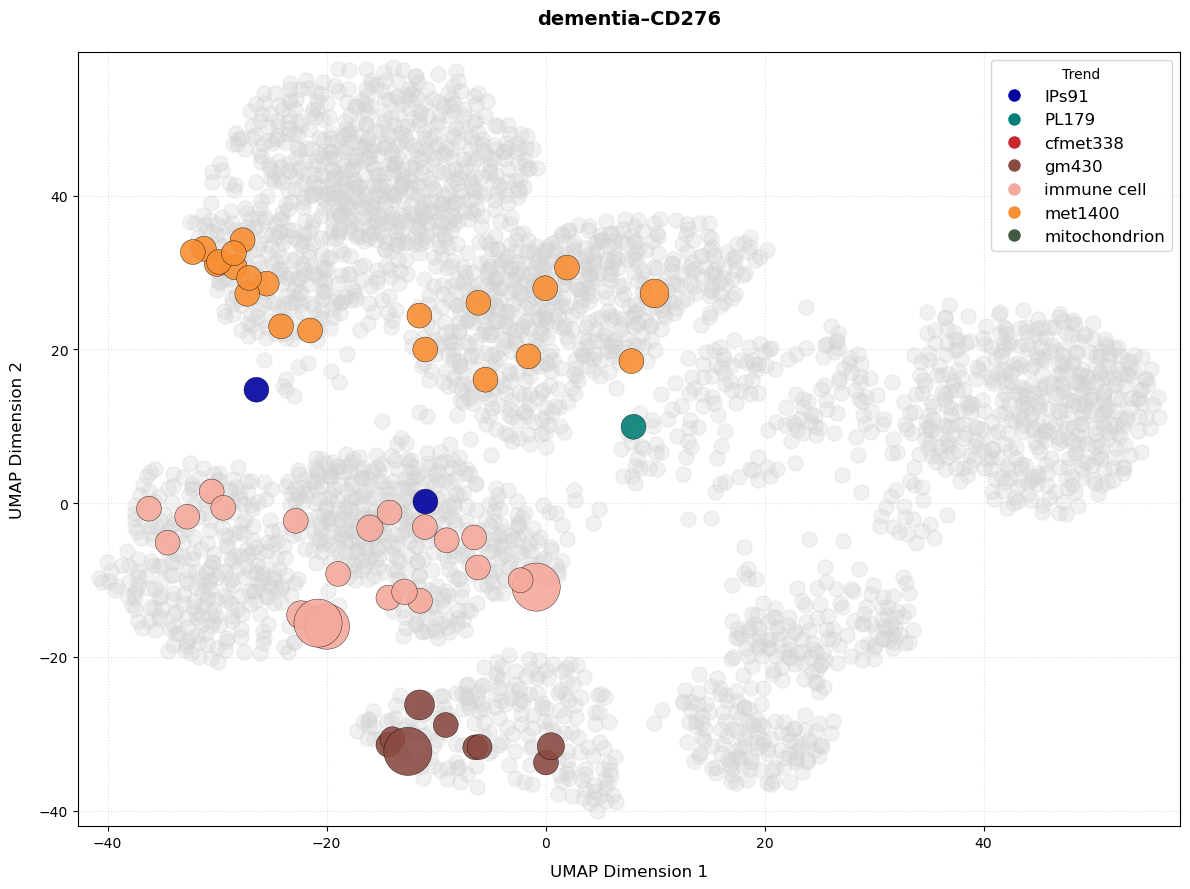

Adjusted Rand Index: 0.167
Silhouette Score: 0.193


In [3]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score


filtered_df = pd.read_csv('/code/Figure6/Figure6ab/dementia_MR_combined_IVW4_cleaned.csv', encoding='utf-8-sig')


filtered_df.columns = filtered_df.columns.str.strip()

print(filtered_df.columns)


features = filtered_df.iloc[:, 2:].values
trend_labels = filtered_df['Trend'].values


pval_fam3c = filtered_df['pval_CD276'].values


le = LabelEncoder()
trend_encoded = le.fit_transform(trend_labels)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=len(le.classes_), random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(
    np.column_stack([scaled_features, trend_encoded * 0.5])
)


umap_model = umap.UMAP(
    n_neighbors=35,
    min_dist=4,
    spread=5,
    local_connectivity=2,
    n_components=2,
    metric='euclidean',
    random_state=42,
    target_weight=0.4,
    repulsion_strength=1
)
umap_result = umap_model.fit_transform(scaled_features, y=trend_encoded)


custom_colors = ['#0001A1', '#037F77', '#C5272D', '#8A4B43', '#F4A99B', '#F98F34', '#415C42', '#FFDC00']
cmap = ListedColormap(custom_colors[:len(le.classes_)])


norm = BoundaryNorm(boundaries=np.arange(-0.5, len(le.classes_)+0.5), ncolors=len(le.classes_))


gray_size = 120
k = 3
max_size = 1200
sizes = np.where(
    pval_fam3c < 0.05,
    np.minimum(k / pval_fam3c, max_size),
    gray_size
)
sizes = np.minimum(sizes, max_size)
sizes = np.maximum(sizes, gray_size + 200)


plt.figure(figsize=(12, 9))
ax = plt.gca()


def get_compact_range(arr, margin=0.02):
    r = np.ptp(arr)
    return np.min(arr) - r*margin, np.max(arr) + r*margin

ax.set_xlim(*get_compact_range(umap_result[:,0]))
ax.set_ylim(*get_compact_range(umap_result[:,1]))


mask_sig = pval_fam3c < 0.05
scatter_sig = ax.scatter(
    umap_result[mask_sig,0], umap_result[mask_sig,1],
    c=trend_encoded[mask_sig],
    cmap=cmap,
    norm=norm,
    s=sizes[mask_sig],
    edgecolors='black',
    linewidth=0.3,
    alpha=0.9,
    zorder=3
)


mask_nonsig = ~mask_sig
ax.scatter(
    umap_result[mask_nonsig,0], umap_result[mask_nonsig,1],
    c='lightgray',
    s=gray_size,
    alpha=0.3,
    zorder=2
)


handles = [
    plt.Line2D([0],[0], marker='o', color='w',
               label=cls, markerfacecolor=custom_colors[i],
               markersize=10)
    for i, cls in enumerate(le.classes_)
]
plt.legend(handles=handles, title="Trend", loc='best', fontsize=12)


plt.title('dementia–CD276', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('UMAP Dimension 1', fontsize=12, labelpad=10)
plt.ylabel('UMAP Dimension 2', fontsize=12, labelpad=10)


ax.grid(True, linestyle=':', alpha=0.4, which='both')
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('/results/figureenhanced_umap_with_dementia-CD276.pdf',
            dpi=600, bbox_inches='tight')
plt.show()


ari = adjusted_rand_score(trend_labels, kmeans_labels)
silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")


In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score


filtered_df = pd.read_csv('/code/Figure6/Figure6ab/dementia_MR_combined_IVW4_cleaned.csv', encoding='utf-8-sig')


filtered_df.columns = filtered_df.columns.str.strip()

print(filtered_df.columns)

features = filtered_df.iloc[:, 2:].values
trend_labels = filtered_df['Trend'].values


pval_fam3c = filtered_df['pval_EGFRP00533'].values

# 2. 趋势标签编码
le = LabelEncoder()
trend_encoded = le.fit_transform(trend_labels)

# 3. 特征标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. 监督式 KMeans（可选，用于评估）
kmeans = KMeans(n_clusters=len(le.classes_), random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(
    np.column_stack([scaled_features, trend_encoded * 0.5])
)

# 5. UMAP 降维
umap_model = umap.UMAP(
    n_neighbors=35,
    min_dist=4,
    spread=5,
    local_connectivity=2,
    n_components=2,
    metric='euclidean',
    random_state=42,
    target_weight=0.4,
    repulsion_strength=1
)
umap_result = umap_model.fit_transform(scaled_features, y=trend_encoded)

# 6. 配色 & 点大小
custom_colors = ['#0001A1', '#037F77', '#C5272D', '#8A4B43', '#F4A99B', '#F98F34', '#415C42', '#FFDC00']
cmap = ListedColormap(custom_colors[:len(le.classes_)])

# 为离散标签构建 norm
norm = BoundaryNorm(boundaries=np.arange(-0.5, len(le.classes_)+0.5), ncolors=len(le.classes_))

# 点大小：显著 (p<0.05) 越显著越大；不显著固定灰色大小
gray_size = 120
k = 3
max_size = 1200
sizes = np.where(
    pval_fam3c < 0.05,
    np.minimum(k / pval_fam3c, max_size),
    gray_size
)
sizes = np.minimum(sizes, max_size)
sizes = np.maximum(sizes, gray_size + 200)

# 7. 绘图
plt.figure(figsize=(12, 9))
ax = plt.gca()

# 边界留白
def get_compact_range(arr, margin=0.02):
    r = np.ptp(arr)
    return np.min(arr) - r*margin, np.max(arr) + r*margin

ax.set_xlim(*get_compact_range(umap_result[:,0]))
ax.set_ylim(*get_compact_range(umap_result[:,1]))

# 7.1 画显著点 (p<0.05)
mask_sig = pval_fam3c < 0.05
scatter_sig = ax.scatter(
    umap_result[mask_sig,0], umap_result[mask_sig,1],
    c=trend_encoded[mask_sig],
    cmap=cmap,
    norm=norm,
    s=sizes[mask_sig],
    edgecolors='black',
    linewidth=0.3,
    alpha=0.9,
    zorder=3
)

# 7.2 画不显著灰色点
mask_nonsig = ~mask_sig
ax.scatter(
    umap_result[mask_nonsig,0], umap_result[mask_nonsig,1],
    c='lightgray',
    s=gray_size,
    alpha=0.3,
    zorder=2
)

# 图例
handles = [
    plt.Line2D([0],[0], marker='o', color='w',
               label=cls, markerfacecolor=custom_colors[i],
               markersize=10)
    for i, cls in enumerate(le.classes_)
]
plt.legend(handles=handles, title="Trend", loc='best', fontsize=12)

# 标题与坐标
plt.title('dementia–EGFR', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('UMAP Dimension 1', fontsize=12, labelpad=10)
plt.ylabel('UMAP Dimension 2', fontsize=12, labelpad=10)

# 网格
ax.grid(True, linestyle=':', alpha=0.4, which='both')
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('E:/neuro_od/T2D-痴呆结果/MR表型组汇总/enhanced_umap_with_dementia-EGFR.pdf',
            dpi=600, bbox_inches='tight')
plt.show()

# 8. 评估指标
ari = adjusted_rand_score(trend_labels, kmeans_labels)
silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")


In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score

# 1. 加载数据
filtered_df = pd.read_csv('E:/neuro_od/T2D-痴呆结果/MR表型组汇总/dementia_MR_combined_IVW4_cleaned.csv', encoding='utf-8-sig')
# 去除列名可能的空格
filtered_df.columns = filtered_df.columns.str.strip()

# 打印列名以确认
print(filtered_df.columns)

# 特征矩阵（跳过 Protein 和 Trend 两列）
features = filtered_df.iloc[:, 2:].values
trend_labels = filtered_df['Trend'].values

# 读取 pval_FAM3C 列
pval_fam3c = filtered_df['pval_GDF15Q99988'].values

# 2. 趋势标签编码
le = LabelEncoder()
trend_encoded = le.fit_transform(trend_labels)

# 3. 特征标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. 监督式 KMeans（可选，用于评估）
kmeans = KMeans(n_clusters=len(le.classes_), random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(
    np.column_stack([scaled_features, trend_encoded * 0.5])
)

# 5. UMAP 降维
umap_model = umap.UMAP(
    n_neighbors=35,
    min_dist=4,
    spread=5,
    local_connectivity=2,
    n_components=2,
    metric='euclidean',
    random_state=42,
    target_weight=0.4,
    repulsion_strength=1
)
umap_result = umap_model.fit_transform(scaled_features, y=trend_encoded)

# 6. 配色 & 点大小
custom_colors = ['#0001A1', '#037F77', '#C5272D', '#8A4B43', '#F4A99B', '#F98F34', '#415C42', '#FFDC00']
cmap = ListedColormap(custom_colors[:len(le.classes_)])

# 为离散标签构建 norm
norm = BoundaryNorm(boundaries=np.arange(-0.5, len(le.classes_)+0.5), ncolors=len(le.classes_))

# 点大小：显著 (p<0.05) 越显著越大；不显著固定灰色大小
gray_size = 120
k = 3
max_size = 1200
sizes = np.where(
    pval_fam3c < 0.05,
    np.minimum(k / pval_fam3c, max_size),
    gray_size
)
sizes = np.minimum(sizes, max_size)
sizes = np.maximum(sizes, gray_size + 200)

# 7. 绘图
plt.figure(figsize=(12, 9))
ax = plt.gca()

# 边界留白
def get_compact_range(arr, margin=0.02):
    r = np.ptp(arr)
    return np.min(arr) - r*margin, np.max(arr) + r*margin

ax.set_xlim(*get_compact_range(umap_result[:,0]))
ax.set_ylim(*get_compact_range(umap_result[:,1]))

# 7.1 画显著点 (p<0.05)
mask_sig = pval_fam3c < 0.05
scatter_sig = ax.scatter(
    umap_result[mask_sig,0], umap_result[mask_sig,1],
    c=trend_encoded[mask_sig],
    cmap=cmap,
    norm=norm,
    s=sizes[mask_sig],
    edgecolors='black',
    linewidth=0.3,
    alpha=0.9,
    zorder=3
)

# 7.2 画不显著灰色点
mask_nonsig = ~mask_sig
ax.scatter(
    umap_result[mask_nonsig,0], umap_result[mask_nonsig,1],
    c='lightgray',
    s=gray_size,
    alpha=0.3,
    zorder=2
)

# 图例
handles = [
    plt.Line2D([0],[0], marker='o', color='w',
               label=cls, markerfacecolor=custom_colors[i],
               markersize=10)
    for i, cls in enumerate(le.classes_)
]
plt.legend(handles=handles, title="Trend", loc='best', fontsize=12)

# 标题与坐标
plt.title('dementia–GDF15', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('UMAP Dimension 1', fontsize=12, labelpad=10)
plt.ylabel('UMAP Dimension 2', fontsize=12, labelpad=10)

# 网格
ax.grid(True, linestyle=':', alpha=0.4, which='both')
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('E:/neuro_od/T2D-痴呆结果/MR表型组汇总/enhanced_umap_with_dementia-GDF15.pdf',
            dpi=600, bbox_inches='tight')
plt.show()

# 8. 评估指标
ari = adjusted_rand_score(trend_labels, kmeans_labels)
silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")
